In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


In [4]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


In [5]:
y.backward()

In [6]:
x.grad

tensor([6.])

In [6]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)

tensor([1., 1., 1.])


In [5]:
# Exercise 1
# Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula
import torch
import matplotlib.pyplot as plt
x = torch.tensor([1.0, 2.0], requires_grad=True)
y = torch.sigmoid(x)
y=y.sum()
y=y.backward()
print (x.grad)

y=1/(1+ torch.exp(-x))
print(y*(1-y))


tensor([0.1966, 0.1050])
tensor([0.1966, 0.1050], grad_fn=<MulBackward0>)


In [6]:
# Exercise 2.

# Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula


x = torch.tensor([1.0, 2.0], requires_grad=True)
y= x
y=y.sum()
y=y.backward()
print (x.grad)


grad_formula = torch.tensor([1.0, 1.0])  # Construct tensor with ones manually
print(grad_formula)



tensor([1., 1.])
tensor([1., 1.])


In [7]:
# Exercise 3.

# Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

x = torch.tensor([1.0, 0.0], requires_grad=True)
Rel = torch.nn.ReLU()
y= Rel(x)
y=y.sum().backward()
print(x.grad)

grad= torch.where(x > 0, torch.tensor(1.0), torch.tensor(0.0))
print(grad)

tensor([1., 0.])
tensor([1., 0.])


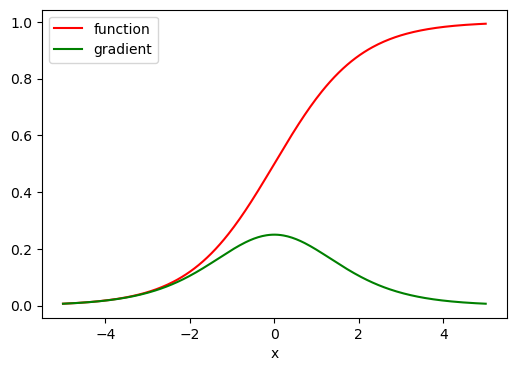

In [8]:

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

x = torch.linspace(-5, 5, 300)
y = sigmoid(x)
y_grad = sigmoid(x) * (1 - sigmoid(x))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
ax.plot(x, y, 'red', label='function')
ax.plot(x, y_grad, 'green', label='gradient')
ax.set_xlabel('x')
plt.legend()
plt.show()


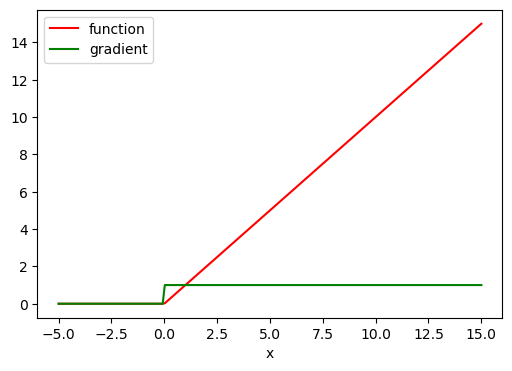

In [9]:

Rel = torch.nn.ReLU()    
x = torch.linspace(-5, 15, 200)
y = Rel(x)
y_grad = torch.where(x > 0, 1, 0)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
ax.plot(x, y, 'red', label='function')
ax.plot(x, y_grad, 'green', label='gradient')
ax.set_xlabel('x')
plt.legend()
plt.show()


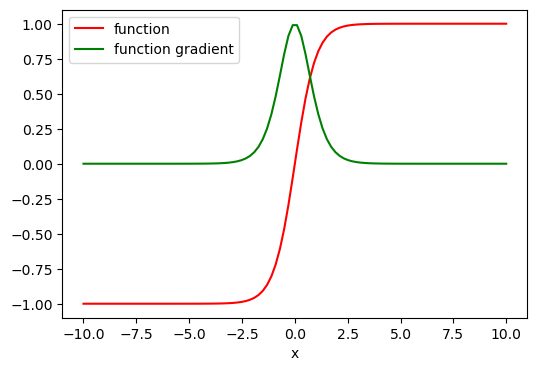

In [10]:


def tanh_grad(x):
    return 1 - torch.tanh(x) ** 2

x = torch.linspace(-10, 10, 100)
y = torch.tanh(x)

y_grad=tanh_grad(x)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
ax.plot(x, y, 'red',  label='function')
ax.plot(x, y_grad, 'green', label='function gradient')
ax.set_xlabel('x')
plt.legend()
plt.show()


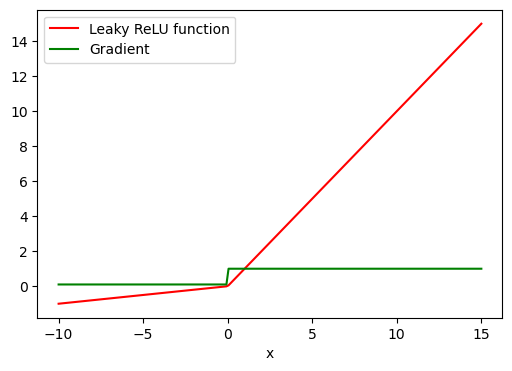

In [11]:


x = torch.linspace(-10, 15, 200, requires_grad=True)
Lrelu = torch.nn.LeakyReLU(0.1)
y = Lrelu(x)
y.sum().backward()
grad = x.grad
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(x.detach().numpy(), y.detach().numpy(), 'red', label='Leaky ReLU function')
ax.plot(x.detach().numpy(), grad.detach().numpy(), 'green', label='Gradient')
ax.set_xlabel('x')
plt.legend()
plt.show()

In [12]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x

In [73]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)

tensor([0.5800], grad_fn=<SigmoidBackward0>)


In [74]:
# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.5151
Epoch [200/1000], Loss: 0.4962
Epoch [300/1000], Loss: 0.4932
Epoch [400/1000], Loss: 0.4927
Epoch [500/1000], Loss: 0.4925
Epoch [600/1000], Loss: 0.4925
Epoch [700/1000], Loss: 0.4925
Epoch [800/1000], Loss: 0.4925
Epoch [900/1000], Loss: 0.4925
Epoch [1000/1000], Loss: 0.4925


In [75]:
# Exercise 8

In [105]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x

perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


# Generate a test dataset for logic OR operation
test_input_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)

# Define the labels for the logic OR operation
test_labels = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

# Pass the test dataset through the trained perceptron
with torch.no_grad():
    predictions = perceptron(test_input_data)

    # Round the predictions to get binary values (0 or 1)
    binary_predictions = torch.round(predictions)
    
    # Compare the predictions with the actual labels and calculate the accuracy
    correct_predictions = torch.sum(binary_predictions == test_labels)
    total_samples = test_labels.size(0)
    accuracy = correct_predictions.item() / total_samples

print(f"Accuracy: {accuracy:.2f}")

tensor([0.3614], grad_fn=<SigmoidBackward0>)
Epoch [100/1000], Loss: 0.5868
Epoch [200/1000], Loss: 0.5827
Epoch [300/1000], Loss: 0.5819
Epoch [400/1000], Loss: 0.5817
Epoch [500/1000], Loss: 0.5816
Epoch [600/1000], Loss: 0.5816
Epoch [700/1000], Loss: 0.5816
Epoch [800/1000], Loss: 0.5816
Epoch [900/1000], Loss: 0.5816
Epoch [1000/1000], Loss: 0.5816
Accuracy: 0.50
